# MINIST dataset using Artificial Neural Network
## Question 1
`Batch Normalization`을 적용한 것과 적용하지 않은 ANN 모델을 비교하시오.

## Task
- Use `ANN` model
- Compare the effect of `BatchNormalization`

## Load Libraries

In [5]:
# etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [6]:
# Artificial Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.utils import plot_model

# set random seeds
np.random.seed(0)
tf.random.set_seed(0)

## Load Dataset

In [7]:
# import dataset
from tensorflow.keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [8]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: \n", dict(zip(unique, counts)))

Train labels: 
 {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [9]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: \n", dict(zip(unique, counts)))

Test labels: 
 {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


## Data Visualization

In [10]:
print(x_train.shape)

(60000, 28, 28)


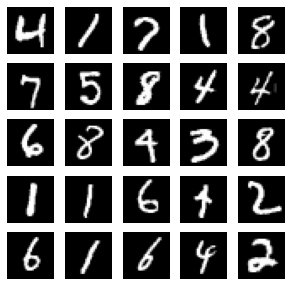

In [11]:
# Plot 25 mnist digits samples from train dataset
index = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[index]
labels = y_train[index]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))

for i in range(len(index)):
    plt.subplot(5, 5, i + 1)  # nrows, ncols, index
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist_plot.png")
plt.close('all')

## Model Define

### Define labels

- After loading the MNIST dataset, the number of labels is computed as:

In [12]:
# check labels
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Data Preprocessing

In [13]:
# label counts
num_labels = len(np.unique(y_train))
num_labels

10

In [14]:
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
# Before reshape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [16]:
# image dimensions
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [17]:
# reshape
x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])

In [18]:
# After reshape
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Set Parameters

In [30]:
# parameters
batch_size = 128
hidden_units = 300
dropout = 0.3
epoch = 50

### Model Architecture

**Model without BatchNorm (NON BATCHNORM MODEL)**

In [20]:
NBN_model = Sequential()
# 1st Layer
NBN_model.add(Dense(hidden_units, input_dim=input_size))
NBN_model.add(Activation('relu'))
NBN_model.add(Dropout(dropout))

# 2nd Layer
NBN_model.add(Dense(hidden_units))
NBN_model.add(Activation('relu'))
NBN_model.add(Dropout(dropout))

# 2nd Layer
NBN_model.add(Dense(num_labels))
NBN_model.add(Activation('softmax'))

In [21]:
# 신경망 모형 구조 확인
NBN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3

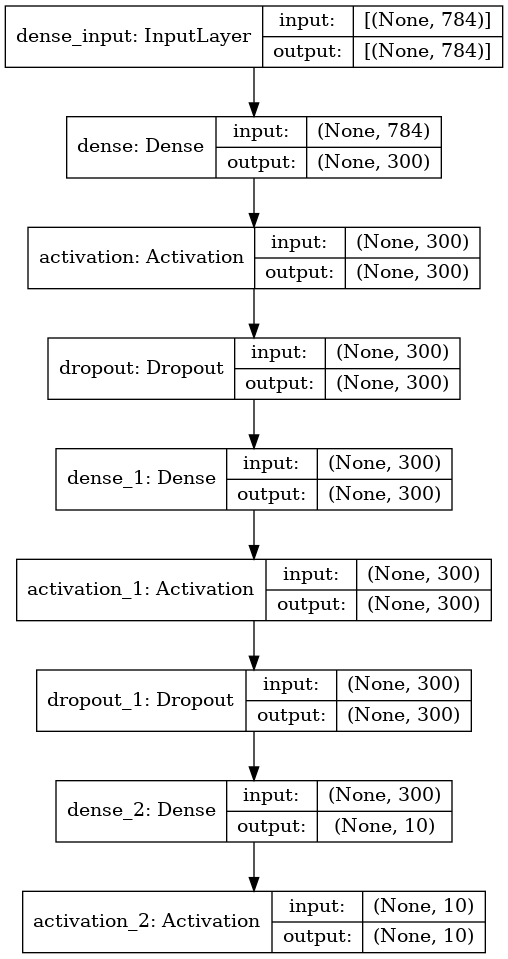

In [22]:
plot_model(NBN_model, to_file='Model-without-BatchNorm.png', show_shapes=True)

**Model with BatchNorm (BATCHNORM MODEL)**

In [23]:
BN_model = Sequential()
# 1st Layer
BN_model.add(Dense(hidden_units, input_dim=input_size))
BN_model.add(BatchNormalization())
BN_model.add(Activation('relu'))
BN_model.add(Dropout(dropout))

# 2nd Layer
BN_model.add(Dense(hidden_units))
BN_model.add(BatchNormalization())
BN_model.add(Activation('relu'))
BN_model.add(Dropout(dropout))

# 2nd Layer
BN_model.add(Dense(num_labels))
BN_model.add(BatchNormalization())
BN_model.add(Activation('softmax'))

In [24]:
# 신경망 모형 구조 확인
BN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
activation_3 (Activation)    (None, 300)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation_4 (Activation)    (None, 300)              

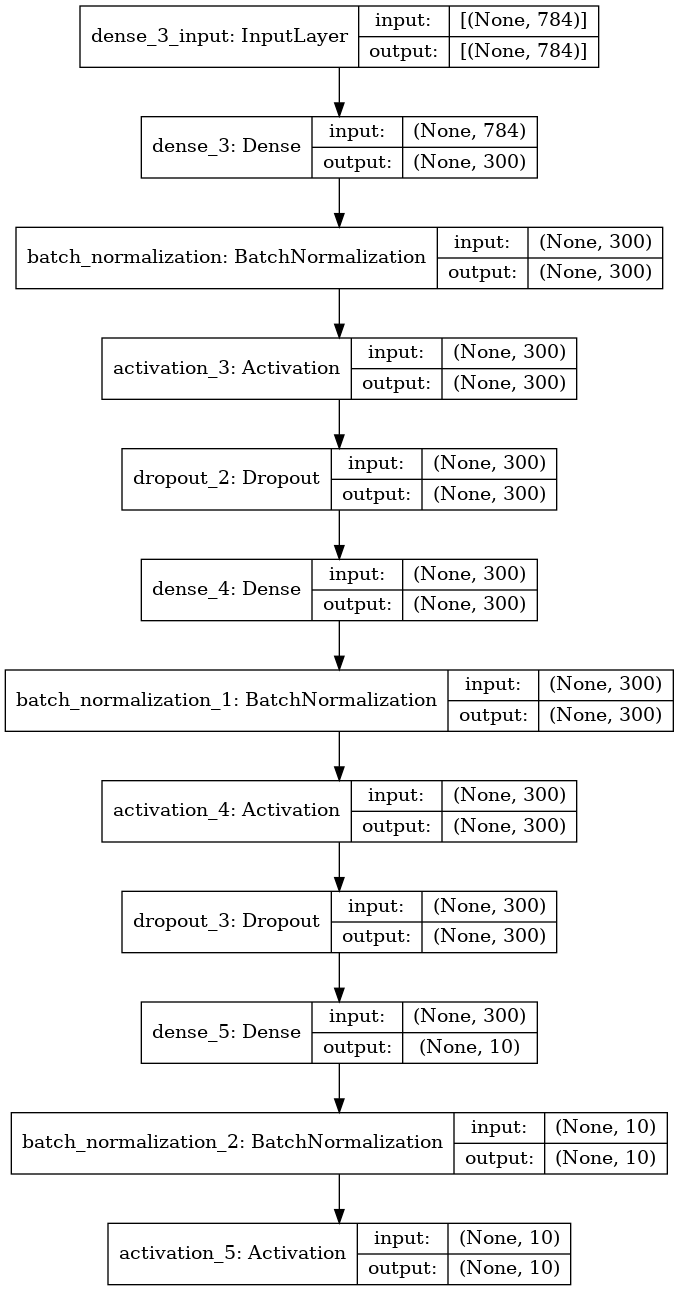

In [26]:
plot_model(BN_model, to_file='Model-with-BatchNorm.png', show_shapes=True)

## Compile and Train Model

In [27]:
# 모형 컴파일(BATCHNORM)
BN_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [31]:
# 모형 컴파일(NON-BATCHNORM)
NBN_model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [34]:
# 신경망 학습(BATCHNORM)
start = time.time()
BN_hist = BN_model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size)
end = time.time()
BN_time = end-start
print(BN_time)

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.5573 - accuracy: 0.9021
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2784 - accuracy: 0.9522
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1900 - accuracy: 0.9635
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1450 - accuracy: 0.9700
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1173 - accuracy: 0.9748
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0996 - accuracy: 0.9767
Epoch 7/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0823 - accuracy: 0.9811
Epoch 8/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0726 - accuracy: 0.9822
Epoch 9/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9845
Epoch 10/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0591 - accuracy: 0.9854

In [35]:
# 신경망 학습(Non-BATCHNORM)
start = time.time()
NBN_hist = NBN_model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size)
end = time.time()
NBN_time = end-start
print(NBN_time)

Epoch 1/50
469/469 [==============================] - 1s 2ms/step - loss: 4.1207 - accuracy: 0.7646
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 0.7465 - accuracy: 0.8444
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.5521 - accuracy: 0.8790
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4591 - accuracy: 0.8959
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 0.3735 - accuracy: 0.9129
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 0.3327 - accuracy: 0.9214
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2740 - accuracy: 0.9324
Epoch 8/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2394 - accuracy: 0.9384
Epoch 9/50
469/469 [==============================] - 1s 2ms/step - loss: 0.2290 - accuracy: 0.9411
Epoch 10/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2082 - accuracy: 0.9450

## Plot Accuracy and Loss

In [42]:
import numpy as np
epochs = np.arange(1,epoch+1)
print(epochs)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [44]:
print(BN_hist)
print(NBN_hist)

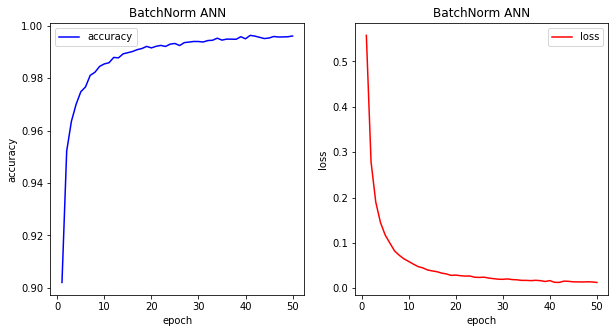

In [53]:
# BatchNorm ACC/LOSS 그래프
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, BN_hist.history['accuracy'], label='accuracy', color = 'b')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('BatchNorm ANN')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, BN_hist.history['loss'], label='loss', color = 'r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('BatchNorm ANN')
plt.legend()

plt.show()

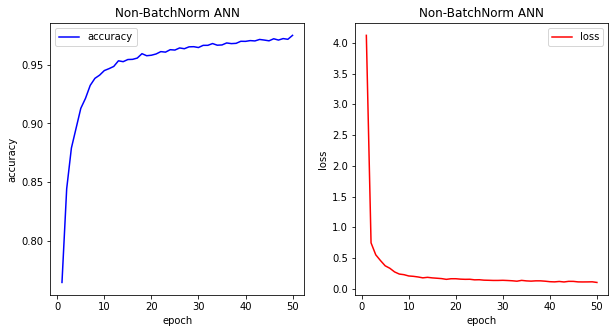

In [54]:
# Non-BatchNorm ACC/LOSS 그래프
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, NBN_hist.history['accuracy'], label='accuracy', color = 'b')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Non-BatchNorm ANN')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, NBN_hist.history['loss'], label='loss', color = 'r')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Non-BatchNorm ANN')
plt.legend()

plt.show()

## Evaluate Model

In [57]:
BN_loss, BN_acc = BN_model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.3f%%" % (100.0 * BN_acc))
print(BN_loss)

79/79 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9857

Test accuracy: 98.570%
0.05158843845129013


In [58]:
NBN_loss, NBN_acc = NBN_model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.3f%%" % (100.0 * NBN_acc))
print(NBN_loss)

79/79 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.9744

Test accuracy: 97.440%
0.1353573352098465
